## Decision Tree Regression
### the purpose of this analysis is to determine the steps/ sales tires and predict the labour usage of a given sales level


In [1]:
#import related library
import pandas as pd
import numpy as np
from sklearn import datasets
pd.options.display.max_rows=6
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df=pd.read_csv('Decision Tree Regression - Sales Tires.csv',sep=',',error_bad_lines=False)

In [3]:
# check the quality of the dataset
df.describe()

,storeid,FiscalYear,periodnumber,Concept,PeriodIndex,PayrollAllowable,PayrollAllowableHrs,PayrollAllowableOTHrs,RegHhours,RegAmount,OTHours,OTAmount,TicketCount,StoreID2,PeriodIndex3,Budget Hours,Acutal Hours,Actual Amount,Actual Mixed Rate
count,8532.000000,8532.0,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8532.000000,8524.000000,8524.000000,8524.00000,8532.000000,8532.000000,8532.000000,8532.000000
mean,195.115096,2019.0,23.531060,35.610642,6321.531060,5706.972925,46.858826,6.196800,350.719612,4212.833747,77.075303,1394.108942,2250.522994,195.155092,6321.54329,442.555389,427.794916,5606.942688,13.073371
std,99.069396,0.0,13.282194,16.180245,13.282194,1702.473881,143.145242,20.966083,106.217353,1613.988144,31.463535,574.335834,879.847567,99.086782,13.28032,112.434926,111.510134,1772.614325,1.847398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,190.000000,2019.0,24.000000,30.000000,6322.000000,5350.000000,0.000000,0.000000,339.291000,3866.169850,76.936000,1351.315000,2122.000000,191.000000,6322.00000,428.584302,416.936500,5277.010000,12.707177
75%,288.000000,2019.0,35.000000,30.000000,6333.000000,6600.000000,0.000000,0.000000,392.447250,4984.646000,96.930000,1720.552500,2796.250000,288.000000,6333.00000,499.785159,480.750500,6490.570625,14.292857
max,346.000000,2019.0,46.000000,80.000000,6344.000000,16000.000000,785.000000,138.000000,1047.140000,16025.100000,208.604000,4475.800000,6883.000000,346.000000,6344.00000,1039.734729,1058.560000,16288.210000,19.078917


In [4]:
# check for any NA or missing data
df.isna()

,storeid,FiscalYear,periodnumber,StoreName,StoreSuperCustom,Region,ORegion,Concept,PeriodIndex,PayrollAllowable,...,OTHours,OTAmount,TicketCount,StoreID2,PeriodIndex3,Groups,Budget Hours,Acutal Hours,Actual Amount,Actual Mixed Rate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8531,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# a lot of NA at the end, drop na
df=df.dropna()
df

,storeid,FiscalYear,periodnumber,StoreName,StoreSuperCustom,Region,ORegion,Concept,PeriodIndex,PayrollAllowable,...,OTHours,OTAmount,TicketCount,StoreID2,PeriodIndex3,Groups,Budget Hours,Acutal Hours,Actual Amount,Actual Mixed Rate
0,159,2019,43,VALLEY RIVER,HY,WES,WES,30,6341,5200,...,43.520,797.26,1912.0,159.0,6341.0,Excluded,392.856871,386.360,5114.005,13.236373
1,168,2019,11,GREENBRIER,JLU,MAR,MAR,30,6309,4900,...,112.310,1762.24,2708.0,168.0,6309.0,Excluded,417.663037,428.010,5021.390,11.731946
2,314,2019,45,BAY PLAZA,ML,NEW,NEW,30,6343,8000,...,27.832,711.09,2600.0,314.0,6343.0,"2,584-2,992",506.105177,537.317,8493.365,15.806991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8529,328,2019,11,NORTHPARK,WC,TEX,TEX,30,6309,5700,...,56.900,1153.27,3215.0,328.0,6309.0,"2,584-2,992",407.729097,414.120,5789.344,13.979871
8530,162,2019,27,FLATIRON,MT,WES,WES,30,6325,5750,...,80.214,1714.09,1680.0,162.0,6325.0,Excluded,373.022171,371.480,5726.228,15.414633
8531,176,2019,42,OAK VIEW,LH,MID,MID,30,6340,4900,...,103.750,1936.54,1716.0,176.0,6340.0,Excluded,347.661955,331.649,4674.311,14.094151


In [6]:
# check the info the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8524 entries, 0 to 8531
Data columns (total 24 columns):
storeid                  8524 non-null int64
FiscalYear               8524 non-null int64
periodnumber             8524 non-null int64
StoreName                8524 non-null object
StoreSuperCustom         8524 non-null object
Region                   8524 non-null object
ORegion                  8524 non-null object
Concept                  8524 non-null int64
PeriodIndex              8524 non-null int64
PayrollAllowable         8524 non-null int64
PayrollAllowableHrs      8524 non-null float64
PayrollAllowableOTHrs    8524 non-null float64
RegHhours                8524 non-null float64
RegAmount                8524 non-null float64
OTHours                  8524 non-null float64
OTAmount                 8524 non-null float64
TicketCount              8524 non-null float64
StoreID2                 8524 non-null float64
PeriodIndex3             8524 non-null float64
Groups          

In [7]:
# Elinimate outerlines in Steps (ticketcount)
df2=df[df.TicketCount<np.percentile(df.TicketCount,99)]# attention : the percentile is given in percent (99 = 99%)
df2=df2[df.TicketCount>np.percentile(df.TicketCount,1)]# attention : the percentile is given in percent (1= 1%)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8352 entries, 0 to 8531
Data columns (total 24 columns):
storeid                  8352 non-null int64
FiscalYear               8352 non-null int64
periodnumber             8352 non-null int64
StoreName                8352 non-null object
StoreSuperCustom         8352 non-null object
Region                   8352 non-null object
ORegion                  8352 non-null object
Concept                  8352 non-null int64
PeriodIndex              8352 non-null int64
PayrollAllowable         8352 non-null int64
PayrollAllowableHrs      8352 non-null float64
PayrollAllowableOTHrs    8352 non-null float64
RegHhours                8352 non-null float64
RegAmount                8352 non-null float64
OTHours                  8352 non-null float64
OTAmount                 8352 non-null float64
TicketCount              8352 non-null float64
StoreID2                 8352 non-null float64
PeriodIndex3             8352 non-null float64
Groups          

### The dataset has none null cell, it is good to go. 

### Define the target is Actual Hours and feature is ticketcount

In [9]:
# transfer target and feature to df2
df3=df2[['TicketCount','Acutal Hours']]
df3.columns=[['TicketCount','Actual Hours']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8352 entries, 0 to 8531
Data columns (total 2 columns):
(TicketCount,)     8352 non-null float64
(Actual Hours,)    8352 non-null float64
dtypes: float64(2)
memory usage: 195.8 KB


### With scikit-learn implement DecisionTreeRegreesor


In [10]:
#Import decision tree regression medol
from sklearn.tree import DecisionTreeRegressor

In [11]:
# define x/feature and y/target
x=df3[['TicketCount']].values
y=df3[['Actual Hours']].values

In [12]:
#sort x and y by ascending values of x
sort_idx=x.flatten().argsort()
x=x[sort_idx]
y=y[sort_idx]


In [22]:
# fit the model
tree=DecisionTreeRegressor(criterion='mse'
                           ,max_depth=3 # max child leafs is 3
                          )
tree.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

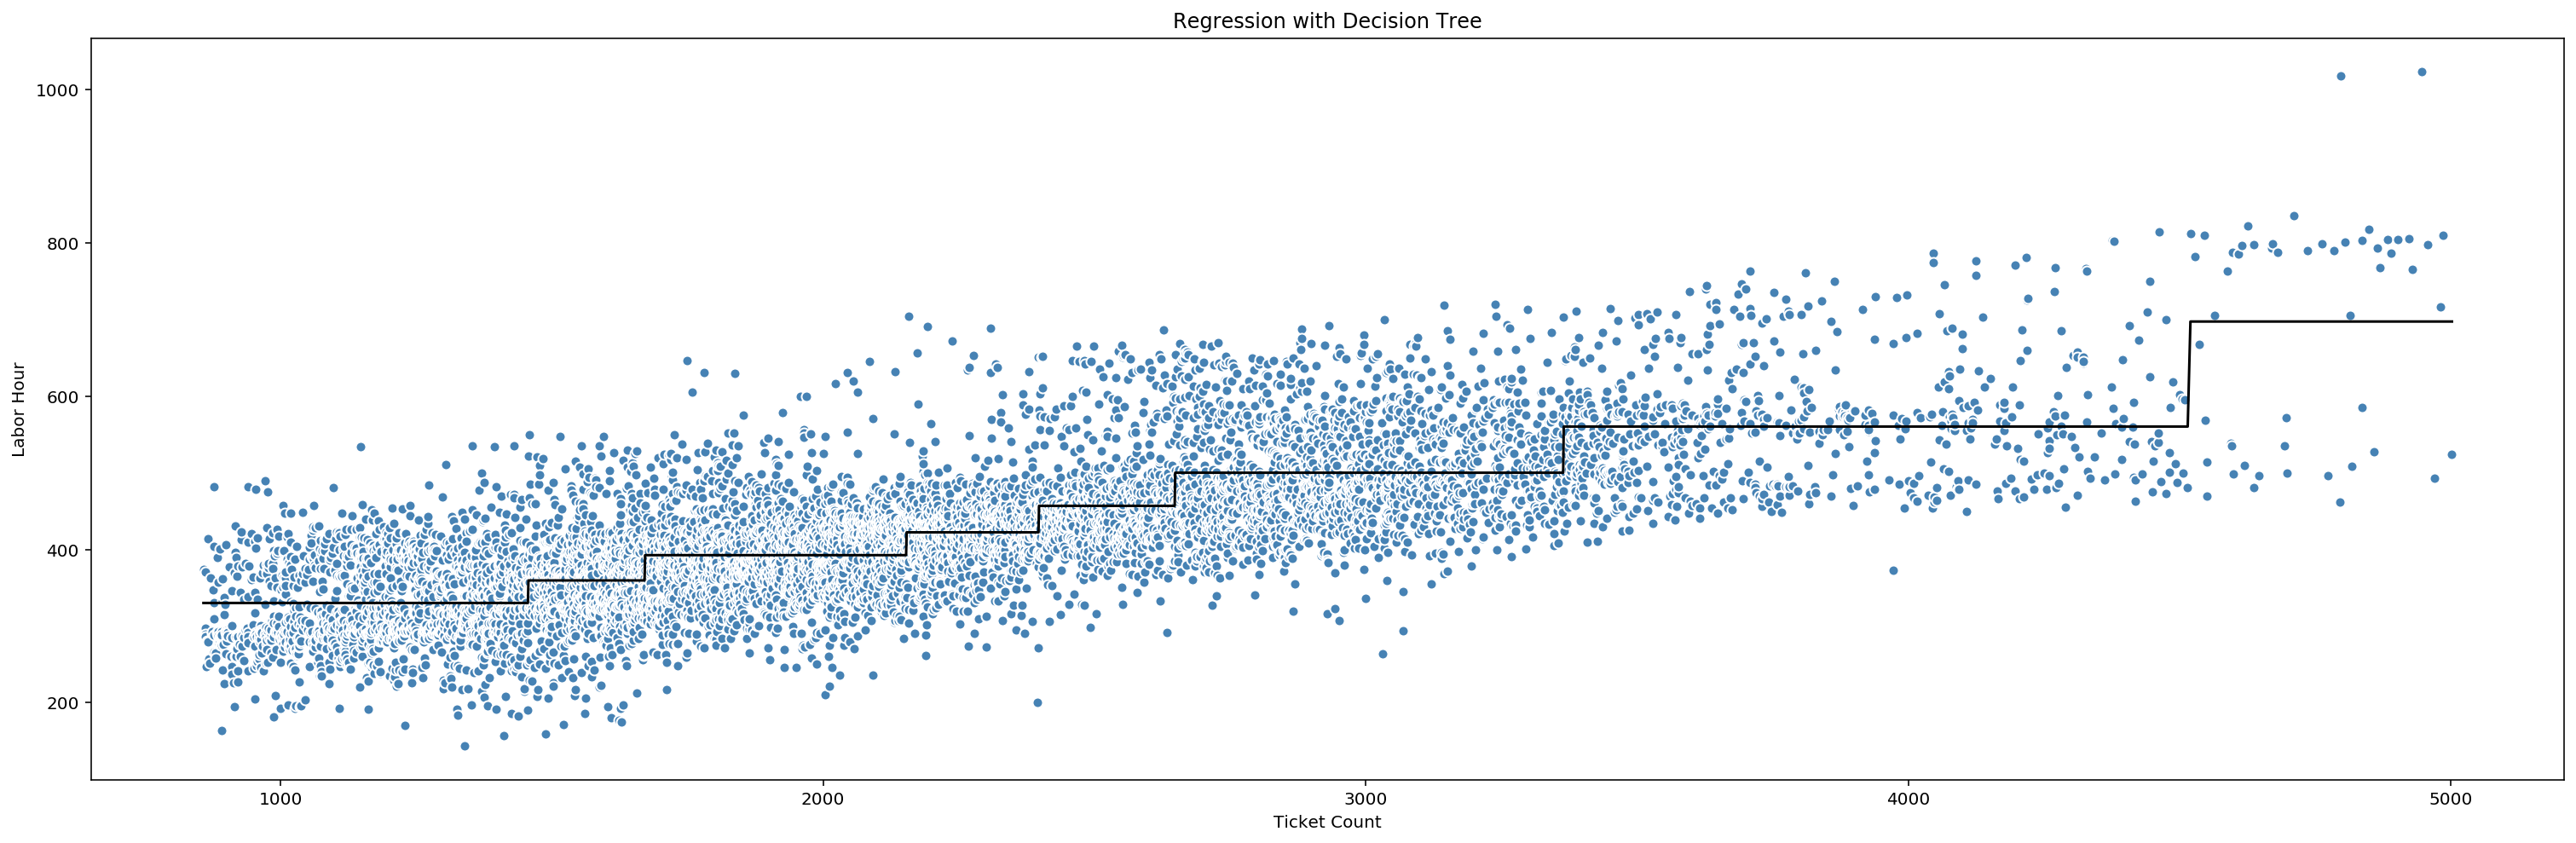

In [23]:
# polt the result
plt.figure(figsize=(26, 8))
plt.scatter(x, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white')
plt.plot(x, tree.predict(x),                      # Plot predicted target against features
         color='black')
plt.xlabel('Ticket Count')
plt.ylabel('Labor Hour')
plt.title('Regression with Decision Tree')
plt.show()

In [26]:
steps=tree.predict(x).reshape(-1,1)
df_steps=pd.DataFrame.from_records(steps)
df_steps['TicketCount']=x
df_steps.columns=('labor/perdiction','Steps/TicketCount')
df_steps

,labor/perdiction,Steps/TicketCount
0,330.129494,858.0
1,330.129494,861.0
2,330.129494,861.0
3,330.129494,862.0
4,330.129494,862.0
...,...,...
8347,697.418434,4957.0
8348,697.418434,4970.0
8349,697.418434,4981.0
8350,697.418434,4985.0


In [28]:
df_steps=df_steps.groupby('labor/perdiction').max()
pd.options.display.max_rows=20
df_steps

,Steps/TicketCount
labor/perdiction,
330.129494,1456.0
359.520976,1671.0
392.519954,2153.0
422.306745,2397.0
456.869346,2648.0
500.093700,3364.0
560.339926,4515.0
697.418434,5002.0


In [29]:
print(df_steps.to_string())

                  Steps/TicketCount
labor/perdiction                   
330.129494                   1456.0
359.520976                   1671.0
392.519954                   2153.0
422.306745                   2397.0
456.869346                   2648.0
500.093700                   3364.0
560.339926                   4515.0
697.418434                   5002.0


In [30]:
plt.savefig('Sales Tires and Labor Hours.png')

<Figure size 432x288 with 0 Axes>